In [19]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
# from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [20]:
def load_happy_dataset():
    train_dataset = h5py.File("train_happy.h5", "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File("test_happy.h5", "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [21]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


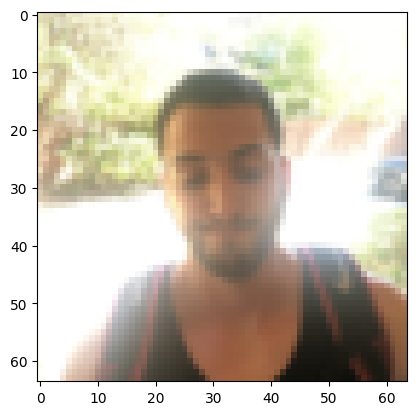

In [22]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [23]:
# GRADED FUNCTION: happyModel

def happyModel():
    model = tf.keras.Sequential([
        tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
        tfl.Conv2D(32, (7,7)),
        tfl.BatchNormalization(axis=-1),
        tfl.ReLU(),
        tfl.MaxPool2D(),
        tfl.Flatten(),
        tfl.Dense(1, activation='sigmoid')
        ])
    
    return model

In [24]:
happy_model = happyModel()
# Print a summary for each layer
# for layer in summary(happy_model):
#     print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
# comparator(summary(happy_model), output)
output

[['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
 ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
 ['BatchNormalization', (None, 64, 64, 32), 128],
 ['ReLU', (None, 64, 64, 32), 0],
 ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
 ['Flatten', (None, 32768), 0],
 ['Dense', (None, 1), 32769, 'sigmoid']]

In [25]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [26]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPadd  (None, 70, 70, 3)         0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                      

In [27]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 3s 68ms/step - loss: 0.9075 - accuracy: 0.7667
Epoch 2/10
38/38 [==============================] - 2s 56ms/step - loss: 0.3765 - accuracy: 0.8717
Epoch 3/10
38/38 [==============================] - 2s 52ms/step - loss: 0.1731 - accuracy: 0.9317
Epoch 4/10
38/38 [==============================] - 2s 53ms/step - loss: 0.1001 - accuracy: 0.9600
Epoch 5/10
38/38 [==============================] - 2s 52ms/step - loss: 0.0967 - accuracy: 0.9700
Epoch 6/10
38/38 [==============================] - 2s 51ms/step - loss: 0.1140 - accuracy: 0.9567
Epoch 7/10
38/38 [==============================] - 2s 50ms/step - loss: 0.1486 - accuracy: 0.9533
Epoch 8/10
38/38 [==============================] - 2s 47ms/step - loss: 0.0993 - accuracy: 0.9617
Epoch 9/10
38/38 [==============================] - 2s 47ms/step - loss: 0.1031 - accuracy: 0.9600
Epoch 10/10
38/38 [==============================] - 2s 47ms/step - loss: 0.1409 - accuracy: 0.9517


In [28]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 25ms/step - loss: 0.4008 - accuracy: 0.8467


[0.4008263051509857, 0.846666693687439]

In [29]:
def load_signs_dataset():
    train_dataset = h5py.File("train_signs.h5", "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File("test_signs.h5", "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [30]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


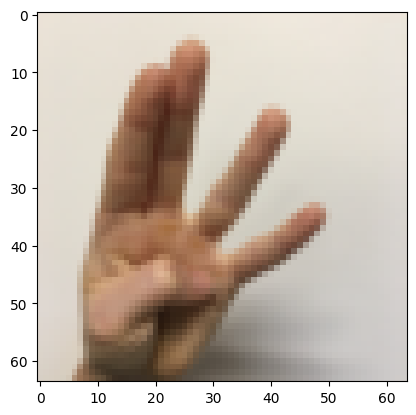

In [31]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [32]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [41]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tfl.Conv2D(8, 4, activation='linear', padding="same", strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(16, 2, activation='linear', padding="same", strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [43]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
output

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 8)         392       
                                                                 
 re_lu_4 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 16)          528       
                                                                 
 re_lu_5 (ReLU)              (None, 8, 8, 16)          0         
                                                           

[['InputLayer', [(None, 64, 64, 3)], 0],
 ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
 ['ReLU', (None, 64, 64, 8), 0],
 ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
 ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
 ['ReLU', (None, 8, 8, 16), 0],
 ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
 ['Flatten', (None, 64), 0],
 ['Dense', (None, 6), 390, 'softmax']]

Both the Sequential and Functional APIs return a TF Keras model object. The only difference is how inputs are handled inside the object model! 

In [44]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 54ms/step - loss: 1.7938 - accuracy: 0.2120 - val_loss: 1.7826 - val_accuracy: 0.2583
Epoch 2/100
17/17 [==============================] - 1s 45ms/step - loss: 1.7798 - accuracy: 0.2296 - val_loss: 1.7769 - val_accuracy: 0.2083
Epoch 3/100
17/17 [==============================] - 1s 44ms/step - loss: 1.7726 - accuracy: 0.2454 - val_loss: 1.7703 - val_accuracy: 0.2667
Epoch 4/100
17/17 [==============================] - 1s 48ms/step - loss: 1.7645 - accuracy: 0.3167 - val_loss: 1.7615 - val_accuracy: 0.2833
Epoch 5/100
17/17 [==============================] - 1s 45ms/step - loss: 1.7540 - accuracy: 0.3046 - val_loss: 1.7504 - val_accuracy: 0.3417
Epoch 6/100
17/17 [==============================] - 1s 44ms/step - loss: 1.7394 - accuracy: 0.3667 - val_loss: 1.7358 - val_accuracy: 0.3833
Epoch 7/100
17/17 [==============================] - 1s 46ms/step - loss: 1.7211 - accuracy: 0.3787 - val_loss: 1.7176 - val_accuracy: 0.4667
Epoch 

In [45]:
history.history

{'loss': [1.7938430309295654,
  1.779762625694275,
  1.7725557088851929,
  1.7644994258880615,
  1.7540475130081177,
  1.7393760681152344,
  1.721121072769165,
  1.698462724685669,
  1.6692020893096924,
  1.6334309577941895,
  1.5912737846374512,
  1.546851634979248,
  1.4995523691177368,
  1.4531774520874023,
  1.4073785543441772,
  1.3638859987258911,
  1.3232218027114868,
  1.285345196723938,
  1.2486672401428223,
  1.214807152748108,
  1.1820063591003418,
  1.1523505449295044,
  1.1239337921142578,
  1.0966415405273438,
  1.070417046546936,
  1.0435025691986084,
  1.0188754796981812,
  0.9919633865356445,
  0.9641636610031128,
  0.9371311068534851,
  0.9136881232261658,
  0.8899745941162109,
  0.8673436045646667,
  0.8457468152046204,
  0.8255009055137634,
  0.8062637448310852,
  0.7879939079284668,
  0.7700315117835999,
  0.7535005211830139,
  0.7373104691505432,
  0.7216918468475342,
  0.7074875831604004,
  0.6933509111404419,
  0.6799755692481995,
  0.6674492955207825,
  0.65487

C:\Users\Asus\AppData\Local\Temp\ipykernel_9552\973814028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9552\973814028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

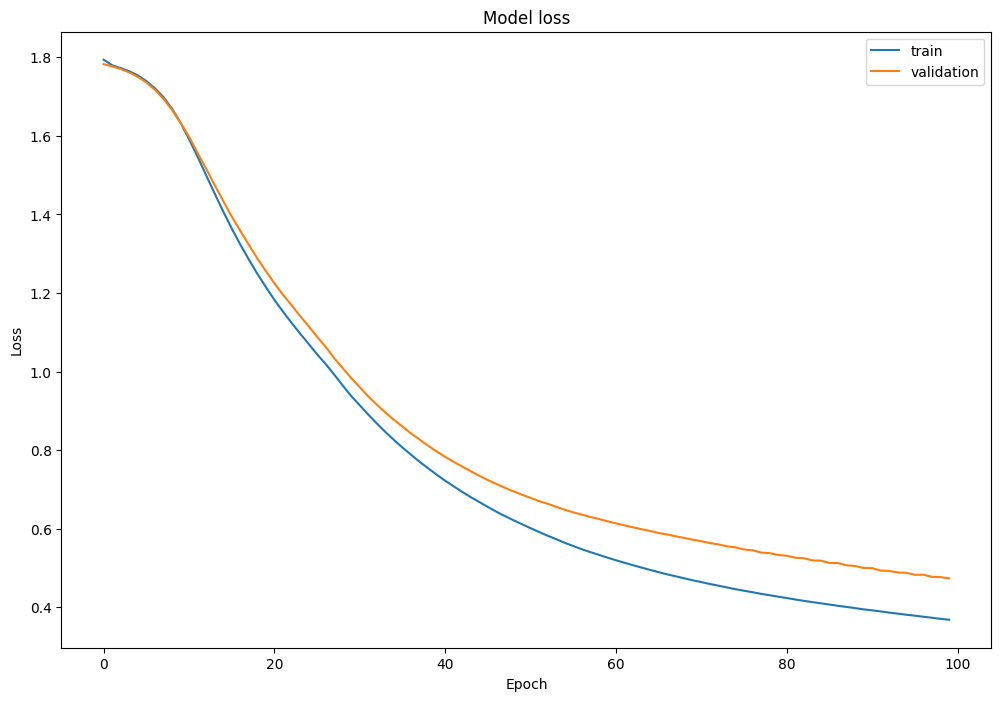

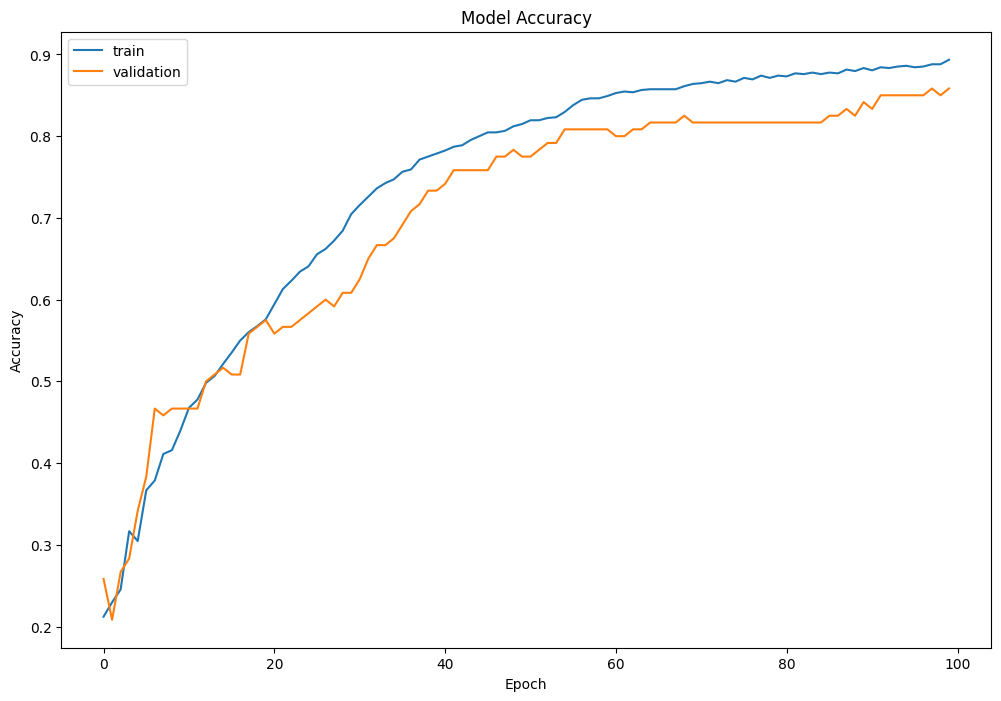

In [46]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')